# Radial Distribution Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# This part is for matplotlib configuration
import matplotlib as mpl

%config InlineBackend.figure_formats = ['svg']
font = 'STIXGeneral'
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.family':'serif'})
mpl.rcParams.update({'font.serif':font})
mpl.rcParams.update({'axes.titlesize':24})
mpl.rcParams.update({'axes.labelsize': 26})
mpl.rcParams.update({'axes.labelpad':14})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 18})
mpl.rcParams.update({'ytick.labelsize': 18})

In [38]:
%reset -f array
%matplotlib inline

# load dataset _______________________________________
dataset = pd.read_csv('random_phi02',
                      header=None,
                      delim_whitespace=True).values
X = dataset * 2

g_PY = np.loadtxt('g02.txt')

L = 20
X = dataset[:, :np.size(dataset, axis=1)-9] * 2

print(X.shape[0])

R = np.zeros((X.shape[0], 0))

for i in range(0, int(X.shape[1] / 3), 3):
    R = np.hstack((R, np.linalg.norm(X[:, i:i+3], axis=1).reshape(-1, 1)))

3056


In [46]:
N_p = X.shape[0]

# N_p = dataset1.shape[0]
rho =  N_p / (2 * L)**3

dr = 0.15
r_pos = np.arange(0.2, 10, dr)
n = np.zeros( (X.shape[0], len(r_pos)) )

q = -1
for sample in R:
    q += 1
    p = -1
    for r in r_pos:
        p += 1 
        for r_i in sample:
            if (r - dr) < r_i and r_i < (r + dr):
                n[q, p] += 1. 
        n[q, p] /= (4 * np.pi * r**2 * 2 * dr * rho )
                
g = np.mean(n, axis=0)

print('Complete!')

Complete!


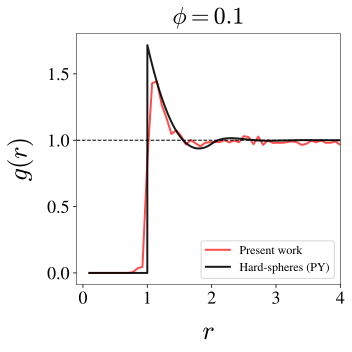

In [47]:
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)

ax.plot(r_pos / 2, g,
#         marker='o',
#         markersize=5,
#         markerfacecolor='none',
        linewidth=2,
        linestyle='-',
        color='red',
        alpha=0.7,
        label='Present work')

ax.plot(g_PY[:, 0], g_PY[:, 1],
        linewidth=2,
        linestyle='-',
        color='black',
        alpha=0.9,
        label='Hard-spheres (PY)')

ax.set_ylabel('$ g(r) $')
ax.set_xlabel('$ r $')
ax.set_title('$ \phi = 0.1 $', pad=10)
ax.legend(fontsize=12, loc='lower right')

ax.set_xlim([-0.1, 4])
ax.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=1)

# ticks _____________________
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(5))
# ax.yaxis.set_major_locator(MaxNLocator(5))

In [234]:
fig.savefig('g_01_.pdf')